# Travelling Salesman Problem


Traveling salesman Problem menyatakan pertanyaan : "Diberikan kota kota dan jarak diantata tiap kota, tentukan rute terdekat yang mengunjungi tiap kota dan kembali ke kota asal?" Pertanyaan ini adalah permasalahan NP sulit di optimisasi kombinatorial , penting dalam teori komputer dan riset operasi

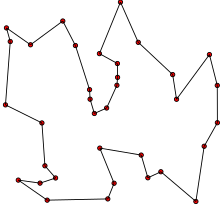

Dalam Teori Kompleksitas Komputasional, versi pilihan dari TSP (dimana diberikan panjang L, tugas untuk memilih antara graf perjalanan dari kebanyakan L) berada pada kelas permasalahan NP-lengkap. Maka, memungkinkan bahwa Kasus Skenario Terburuk untuk kompleksitas waktu pada algoritma apapun pada TSP bertambah superpolinomial (tetapi, tidak lebih dari Hipotesis Waktu Eksponensial) dengan jumlah banyaknya kota.

Permasalahan ini awalnya diformulasikan pada tahun 1930 dan menjadi salah satu permasalahan yang intens dipelajari dalam bidang optimalisasi. Permasalahan ini digunakan sebagai Tolak Ukur dalam komputasi pada metode-metode optimalisasi. Meskipun permasalahan ini sangat susah secara komputasi, banyak heuristik dan Algoritma Eksak diketahui.

TSP memiliki beberapa aplikasi meskipun pada formulasi yang sangat murni, seperti perencanaan, logistik, dan manufaktur dari sirkuit terintegrasi. Sedikit modifikasi, terlihat sebagai sub-permasalahan di lingkup yang luas, seperti DNA sekuens.

source:<a href = "https://id.wikipedia.org/wiki/Permasalahan_Penjual_Keliling">Travelling Saleseman Problem</a>

Untuk permasalahan ini, kromosom telah dipilih menjadi himpunan kota. Oleh karena itu, urutan kromosom **[3, 1, 4, 0, 2]** adalah maka urutan kota yang ditempuh adalah **3 --> 1 --> 4 --> 0 --> 2 --> 3**
.

# Genetic Algorithm

- Genetic Algorithm adalah salah satu teknik pencarian yang digunakan untuk menemukan atau mengapromasikan (perkiraan/mirip) solusi yang optima.
- GA dikelompokan sebagai *global search heuristic*
- GA merupakan salah satu *Evolutionaty Algorithm* yang menggunakn teknik teknik yang terinspirasi dengan oleh *evolutionary biology* seperti *inheritence, mutation, selection, recombnation*

# Konsep GA

1. Representasi genetic sebagai solusi
2. fungsi *fitness* untuk mengevaluasi domain solusi

# Process dari GA

secara iteratif memecahkan masalah ini menggunakan *fitness evaluation, parent selection, crossover, dan mutation*

# 1. Fitness calculation
Fungsi fitness mengevaluasi kualitas dari tiap rute. rute rute yang memiliki jarak yang lebih rendajh memiliki nilai fitness yang lebih besar. 

fitness dihitung dengan:
$$fitness = e^{DNA_{size} * 2 / total\\_distance}$$

contoh nya:,
- Population: $[[0, 2, 1, 3], [1, 3, 0, 2], [2, 0, 3, 1]]$,
- City Positions: $[[0, 0], [1, 2], [2, 0], [3, 3]]$ (coordinates for cities 0, 1, 2, 3) ,
- Total Distances: $[7.211, 8.485, 7.616]$,
- Fitness: $[0.00365, 0.00274, 0.00339]$,

# 2. Parent Selection
Selection merupakan sebuah prosedur memilih parent chromosome untuk menghasilkan off-spring (keturunan)
contoh teknik teknik:
1. **Random Selection** – pemilihan dilakukan secara random dari populasi
2. **Proportional Selection** – probabilitas pemilihan setiap chromosome (individu) 
3. **Rank Based Selection** – menggunakan perangkingan berdasarkan nilai fitness
4. **Roulette Wheel Selection** - (Fitness Proportionate Selection) -Individu dipilih berdasarkan probabilitas yang sebanding dengan nilai fitness-nya. Individu dengan fitness lebih tinggi memiliki peluang lebih besar untuk terpilih.
5. **Tournament Selection** -Sekelompok individu dipilih secara acak (disebut tournament), kemudian individu dengan fitness terbaik dalam kelompok tersebut dipilih.


pada kasus kali ini digunakan Roulette Wheel selection 

Individu dengan nilai fitness lebih tinggi memiliki peluang lebih besar untuk terpilih.
        
Misalnya, dengan nilai kebugaran $[0.00365, 0.00274, 0.00339]$

populasi yang dipilih mungkin: $[[0, 2, 1, 3], [2, 0, 3, 1], [0, 2, 1, 3]]$,

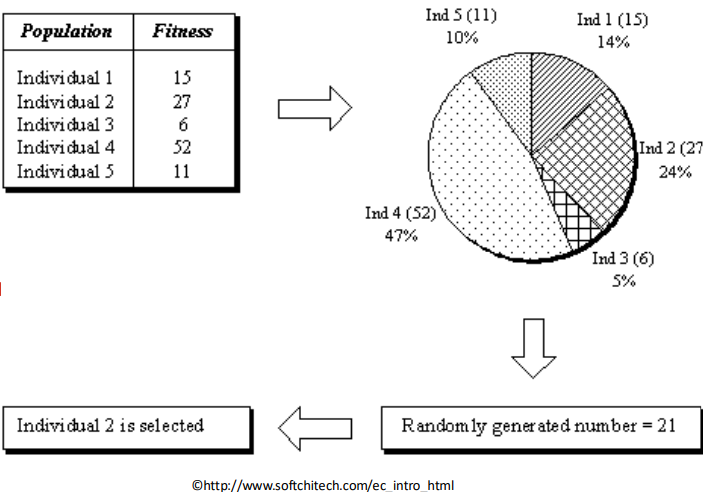

# 3. Crossover
- Dua parent menghasilkan dua offspring
- Terdapat probabilitas chromosome dari dua parent direkombinasi (crossover) secara random untuk menghasilkan offspring
- Secara umum, probabilitas crossover antara 0.6 dan 1.0

Selama crossover(persilangan), sebagian gen (kota) dari satu induk digabungkan dengan gen dari induk lain untuk menghasilkan keturunan, sehingga memastikan tidak ada kota duplikat. Misalnya:

contoh nya
- Parent 1: $[0, 2, 1, 3]$,
- Parent 2: $[2, 0, 3, 1]$,
- Random Mask: $[True, False, True, False]$,
- Offspring: $[2, 3, 0, 1]$,

# 4. Mutation
- Terdapat probabilitas bahwa gene dari anak dirubah secara random
- Umumnya, probabilitas mutation adalah rendah (Misal: 0.001)

Mutasi memperkenalkan keragaman dengan menukar dua kota dalam satu rute dengan probabilitas kecil. 

Misal :(Jika kota pada posisi 1 dan 3 ditukar)

- Before Mutation: [2, 3, 0, 1]
- After Mutation: [2, 1, 0, 3]

## Evolusi
Populasi berevolusi dari generasi ke generasi dengan memilih parent , menerapkan crossover(persilangan), dan memutasi keturunan. Proses ini meningkatkan solusi secara berulang.

# Example:
- Starting Population: $[[0, 2, 1, 3], [1, 3, 0, 2], [2, 0, 3, 1]]$
- Evolved Population: $[[0, 3, 2, 1], [2, 1, 0, 3], [1, 0, 2, 3]]$ 

# TSP problem

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# from tsp import GA

N_CITIES = 20  # DNA size
CROSS_RATE = 0.1
MUTATE_RATE = 0.02
POP_SIZE = 500
N_GENERATIONS = 350

Kelas GA (Genetic Algorithm)
Kelas ini bertanggung jawab untuk menangani proses evolusi

In [8]:
class GA(object):
    
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    #Mengubah DNA (urutan kota) menjadi koordinat kota.
    # Output: Koordinat line_x dan line_y untuk memvisualisasikan jalur.
    def translateDNA(self, DNA, city_position):     # get cities' coord in order
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y
    
    # Menghitung fitness berdasarkan jarak total
    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance

    # Melakukan seleksi individu berdasarkan probabilitas yang ditentukan oleh fitness.
    # Menggunakan metode roulette wheel selection.
    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    # Melakukan pertukaran gen antara dua individu (parent):
    # Memilih titik crossover secara acak.
    # Menjaga urutan kota yang sudah ada untuk menghindari kota yang dikunjungi lebih dari sekali.
    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool_)    # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    # Melakukan mutasi pada individu:
    # Dua kota dalam rute bertukar posisi dengan probabilitas yang ditentukan (mutate_rate).
    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child


    # proses evolusi:
    # 1.Seleksi populasi berdasarkan fitness.
    # 2.Melakukan crossover dan mutasi untuk setiap individu.
    # 3.Memperbarui populasi.
    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

## Class TravelSalesPerson
- memodelkan kota-kota dan memvisualisasikan solusi.

In [9]:

class TravelSalesPerson(object):
    
    # membuat random position untuk kota
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2) 
        plt.ion()
        self.iter = 0

    # untuk memplot kota dalam ruang 2 dimesi
    def plotting(self, lx, ly, total_d, save=False):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        if save: plt.savefig('Images/travelling_salesman/travelling_salesman_{:03d}'.format(self.iter))
        if self.iter%50==0: plt.show()
        self.iter += 1

In [10]:
env = TravelSalesPerson(N_CITIES)

Gen: 0 | best fit: 301.97


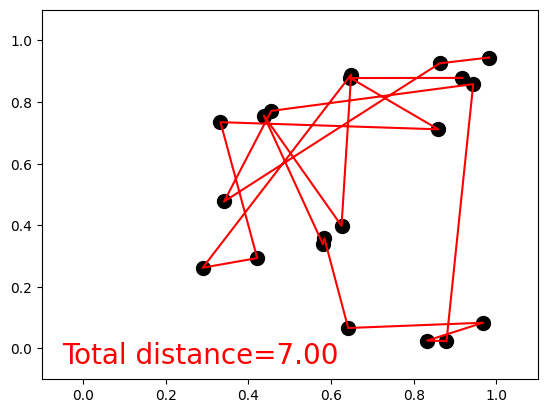

Gen: 50 | best fit: 20691.93


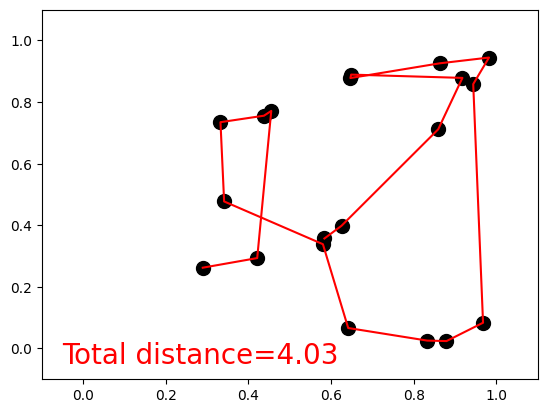

Gen: 100 | best fit: 30342.84


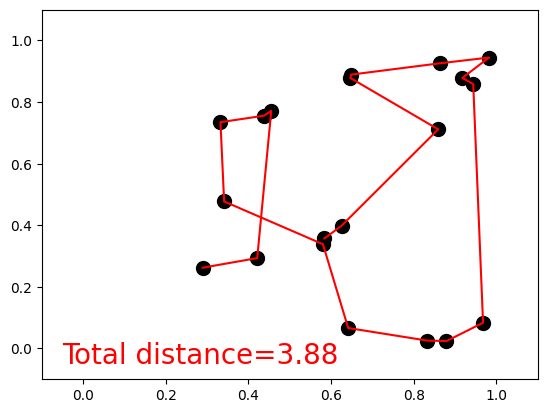

Gen: 150 | best fit: 40380.50


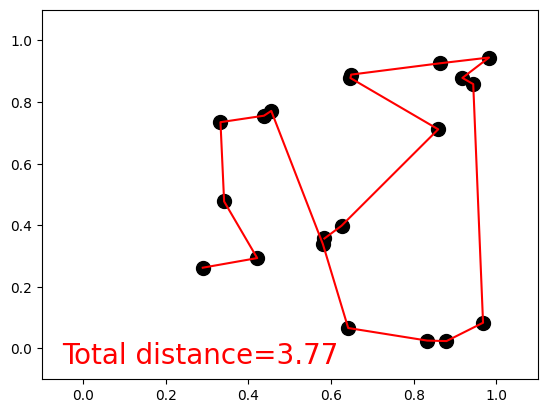

Gen: 200 | best fit: 40380.50


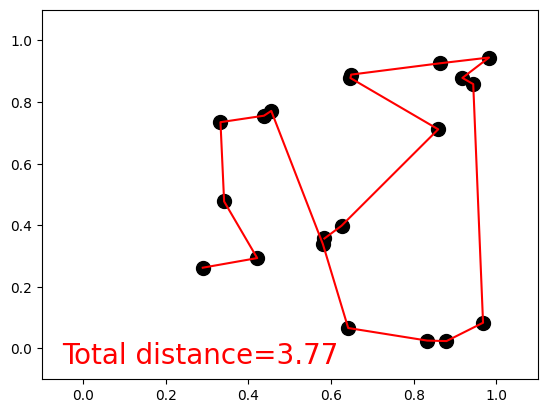

Gen: 250 | best fit: 84994.44


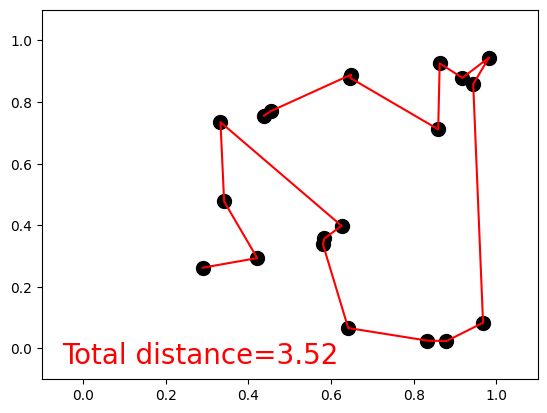

Gen: 300 | best fit: 181723.69


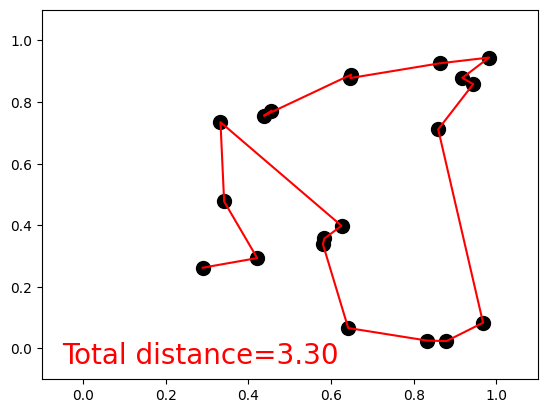

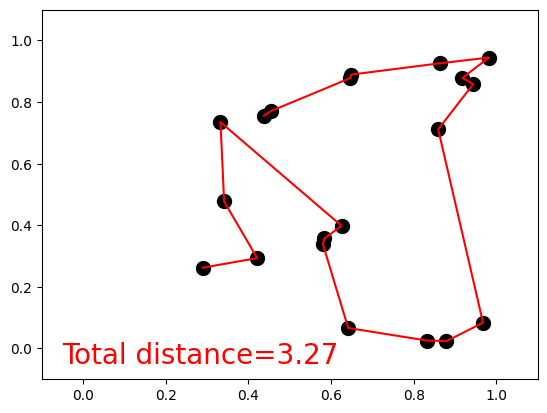

In [11]:
n_runs = 20
fitness_max = np.zeros((n_runs, N_GENERATIONS))
for i in range(n_runs):
    ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)
    for generation in range(N_GENERATIONS):
        lx, ly = ga.translateDNA(ga.pop, env.city_position)
        fitness, total_distance = ga.get_fitness(lx, ly)
        ga.evolve(fitness)
        best_idx = np.argmax(fitness)
        fitness_max[i, generation] = total_distance[best_idx]
        if i==0:
            if generation%50==0: print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)
            env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])

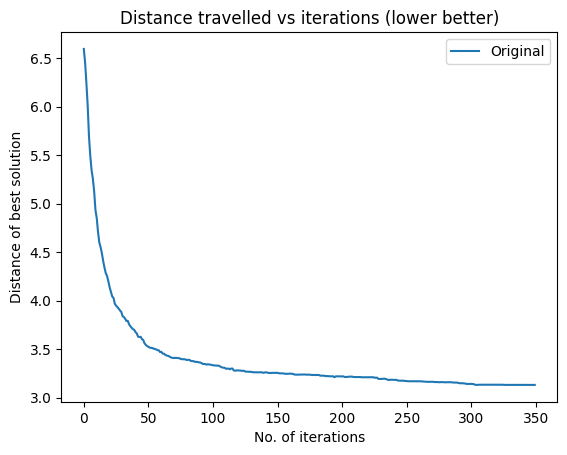

In [12]:
plt.plot(np.average(fitness_max, axis=0), label='Original')
plt.title('Distance travelled vs iterations (lower better)')
plt.xlabel('No. of iterations')
plt.ylabel('Distance of best solution')
plt.legend()

- Dari waktu ke waktu dalam iterasi saat bermutasi mendaptakan hasil yang optimum
- Grafik ini menunjukkan bahwa algoritma genetika berhasil mengoptimalkan solusi, dengan jarak total yang menurun signifikan hingga mendekati nilai optimal.

# dari hasil percobaan tersebut dapar dimodelakan sebuah genetic algorithm untuk memecahakan dan mengoptimisasi masalah Travel Salesman Problem 